In [1]:
import pandas as pd
import numpy as np

In [23]:
df = pd.DataFrame(
    {'A':[14.00,90.20,90.95,96.27,91.21],
     'B':[103.02,107.26,110.35,114.23,114.68], 
     'C':['big','small','big','small','small']})

df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [3]:
# 평균, 최대 최소 값을 이용해서 scaling
df["A"] - df["A"].mean()

0   -62.526
1    13.674
2    14.424
3    19.744
4    14.684
Name: A, dtype: float64

In [4]:
df["A"].max() - df["A"].min()

82.27

In [5]:
# (x - min(x) ) / ( max(x) - min(x) )
(df["A"] - df["A"].mean()) / (df["A"].max() - df["A"].min())

0   -0.760010
1    0.166209
2    0.175325
3    0.239990
4    0.178485
Name: A, dtype: float64

In [11]:
def scale1(x):
    return (x - x.mean()) / (x.max() - x.min())    

In [12]:
scale1(df["A"])

0   -0.760010
1    0.166209
2    0.175325
3    0.239990
4    0.178485
Name: A, dtype: float64

In [14]:
scale1(df["B"])

0   -0.590738
1   -0.227101
2    0.037907
3    0.370669
4    0.409262
Name: B, dtype: float64

In [15]:
# 범주형은 one hot encoding
pd.get_dummies(df['C'])

,big,small
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [24]:
df["A"] = scale1(df["A"])
df["B"] = scale1(df["B"])
df

,A,B,C
0,-0.760010,-0.590738,big
1,0.166209,-0.227101,small
2,0.175325,0.037907,big
3,0.239990,0.370669,small
4,0.178485,0.409262,small


In [25]:
temp = pd.get_dummies(df['C'])
df= pd.concat([df,temp],axis=1)
df = df.drop(["C"], axis=1)
df

,A,B,big,small
0,-0.760010,-0.590738,1,0
1,0.166209,-0.227101,0,1
2,0.175325,0.037907,1,0
3,0.239990,0.370669,0,1
4,0.178485,0.409262,0,1


In [32]:
df = pd.DataFrame(
    {'A':[14.00,90.20,90.95,96.27,91.21],
     'B':[103.02,107.26,110.35,114.23,114.68], 
     'C':['big','small','big','small','small']})

df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [33]:
#z-score  
# (x - x.mean() ) / (x.std())
def scale2(x):
    return (x - x.mean() ) / (x.std())

In [34]:
df["A"] = scale2(df["A"])
df["B"] = scale2(df["B"])
df

,A,B,C
0,-1.784641,-1.405250,big
1,0.390289,-0.540230,small
2,0.411695,0.090174,big
3,0.563541,0.881749,small
4,0.419116,0.973556,small


In [35]:
temp = pd.get_dummies(df["C"])
df = df.iloc[:,:-1]
df = pd.concat([df,temp],axis=1)
df

,A,B,big,small
0,-1.784641,-1.405250,1,0
1,0.390289,-0.540230,0,1
2,0.411695,0.090174,1,0
3,0.563541,0.881749,0,1
4,0.419116,0.973556,0,1


In [36]:
# https://www.kaggle.com/c/titanic

In [37]:
train=pd.read_csv("https://raw.githubusercontent.com/bigdataleeky/python/main/data/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
train.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [38]:
test = pd.read_csv("https://raw.githubusercontent.com/bigdataleeky/python/main/data/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
test.head().T

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,male,female,male,male,female
Age,34.5,47.0,62.0,27.0,22.0
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7.0,9.6875,8.6625,12.2875
Cabin,NaN,NaN,NaN,NaN,NaN


In [43]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
train["PassengerId"].isna().sum()

0

In [50]:
# 결측치의 비율
round(train.isna().sum() /  len(train)*100 ,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [53]:
# age컬럼이 null이 아닌 데이터
train[train["Age"].notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [55]:
# 제거함으로서 데이터의 크기가 확.... 줄거나.... 다른 의미잇는 컬럼의 정보가 없어질때....  제거 하면 안됨
# Gender 컬럼속성이 중요.
train.groupby(["Sex"])["Sex"].count()
# 숙제 : 백분율로 나타내기
# hint 위의 결과를 DataFrame형태의 변수로 저장
# map 함수를 이용

Sex
female    314
male      577
Name: Sex, dtype: int64

In [56]:
train[train["Age"].notnull()].groupby(['Sex'])["Sex"].count()

Sex
female    261
male      453
Name: Sex, dtype: int64

In [57]:
train[train["Age"].notnull()].groupby(["Pclass"])["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [60]:
train["Age"].fillna(
    train.groupby("Pclass")["Age"].transform("mean"), inplace=True
)

In [61]:
train.isnull().sum() / len(train) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [67]:
train.groupby(["Embarked"])["Embarked"].count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [69]:
train["Embarked"].fillna("S", inplace=True)

In [70]:
train.isnull().sum() / len(train) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.000000
dtype: float64

In [71]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
# 범주형 데이터를  원핫인코딩
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [81]:
# 데이터 타입 정리
objec_col = ["Name","Sex","Ticket","Cabin","Embarked"]
numeric_col = ["PassengerId","Survived","Pclass","Age","SibSp","Parch","Fare"]

for colName in numeric_col:
    train[colName] = train[colName].astype(float)     

In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(7), object(5)
memory usage: 83.7+ KB


In [90]:
genderOneHot = pd.get_dummies(train["Sex"], prefix="Gender")
pclassOneHot = pd.get_dummies(train["Pclass"], prefix="Pclass")
pclassOneHot

,Pclass_1.0,Pclass_2.0,Pclass_3.0
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [92]:
# 두개의 데이터프레임을 합치는데 기준은 각각의 인덱스를 기준으로 한다
pd.merge(genderOneHot,pclassOneHot,how="inner", left_index=True, right_index=True)

,Gender_female,Gender_male,Pclass_1.0,Pclass_2.0,Pclass_3.0
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,1,0,0
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,1,0
887,1,0,1,0,0
888,1,0,0,0,1
889,0,1,1,0,0


In [94]:
# 좌우의 인덱스 순서가 동일할때
pd.concat([genderOneHot,pclassOneHot], axis=1)

,Gender_female,Gender_male,Pclass_1.0,Pclass_2.0,Pclass_3.0
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,1,0,0
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,1,0
887,1,0,1,0,0
888,1,0,0,0,1
889,0,1,1,0,0


In [97]:
embarkedOneHot=pd.get_dummies(train["Embarked"],prefix="Embarked")

In [98]:
temp = pd.merge(genderOneHot,pclassOneHot,how="inner", left_index=True, right_index=True)
temp2 = pd.merge(temp,embarkedOneHot,how="inner", left_index=True, right_index=True)
temp2

,Gender_female,Gender_male,Pclass_1.0,Pclass_2.0,Pclass_3.0,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1,0,0,1
1,1,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,1
3,1,0,1,0,0,0,0,1
4,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,0,1,0,1,0,0,0,1
887,1,0,1,0,0,0,0,1
888,1,0,0,0,1,0,0,1
889,0,1,1,0,0,1,0,0


In [99]:
oneHot = temp2

In [103]:
# 생존유무하고 범주형 타입간의 관계
oneHot

,Gender_female,Gender_male,Pclass_1.0,Pclass_2.0,Pclass_3.0,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1,0,0,1
1,1,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,1
3,1,0,1,0,0,0,0,1
4,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,0,1,0,1,0,0,0,1
887,1,0,1,0,0,0,0,1
888,1,0,0,0,1,0,0,1
889,0,1,1,0,0,1,0,0


In [101]:
y = train["Survived"]

In [102]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
def merg_and_get(ldf,rdf, on, how="inner", index=None):
    if index is True:
        return pd.merge(ldf,rdf,how=how, left_index=True, right_index=True)
    else:
        return pd.merge(ldf,rdf,how=how, on=on)  # how 는 join 방법 inner  left right  on : 기준 컬럼

one_hot_df =  merg_and_get(train, pd.get_dummies(train["Sex"],prefix="Sex" ),on=None,index=True) 
one_hot_df = merg_and_get(one_hot_df, pd.get_dummies(train["Pclass"],prefix="Pclass" ),on=None,index=True) 
one_hot_df = merg_and_get(one_hot_df, pd.get_dummies(train["Embarked"],prefix="Embarked" ),on=None,index=True) 
one_hot_df.head()    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1.0,Pclass_2.0,Pclass_3.0,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,0,1,0,0,1,0,0,1
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0,0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1,0,0,1
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,1,0,1,0,0,0,0,1
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S,0,1,0,0,1,0,0,1


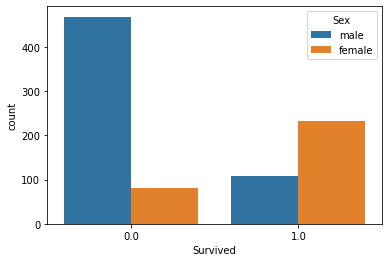

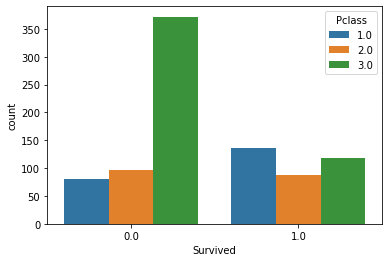

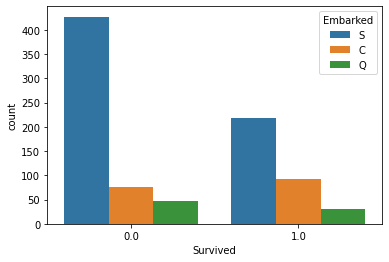

In [118]:
# 생죤율.... 성별, 객실등급, 어느항구에 탔는지
temp_col = ["Sex","Pclass","Embarked"]
for colName in temp_col:
    temp_df = pd.merge(one_hot_df[colName],y,left_index=True,right_index=True)
    sns.countplot(x="Survived", hue=colName,data=temp_df)
    plt.show()

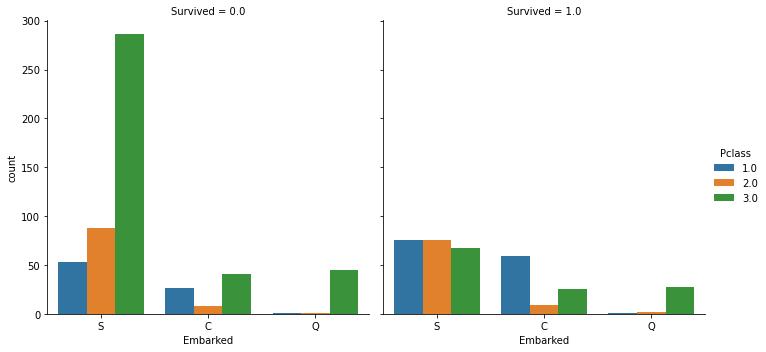

In [125]:
# 범주형 데이터들간의 상관관계
temp_df = pd.merge( one_hot_df[temp_col],y,left_index=True, right_index=True)
sns.catplot(x="Embarked",hue="Pclass",data=temp_df, kind="count",col="Survived")

In [123]:
temp_df

,Sex,Pclass,Embarked,Survived
0,male,3.0,S,0.0
1,female,1.0,C,1.0
2,female,3.0,S,1.0
3,female,1.0,S,1.0
4,male,3.0,S,0.0
...,...,...,...,...
886,male,2.0,S,0.0
887,female,1.0,S,1.0
888,female,3.0,S,0.0
889,male,1.0,C,1.0


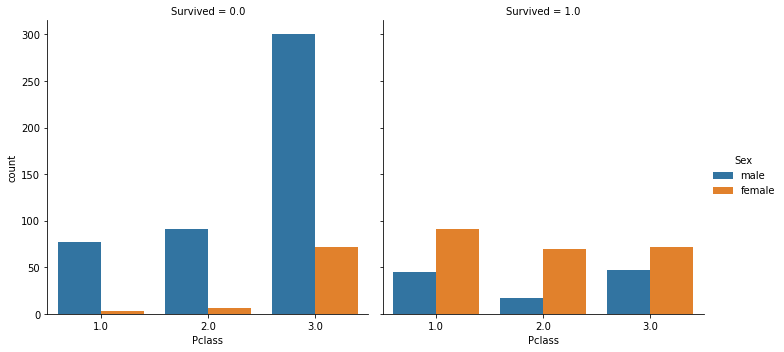

In [127]:
sns.catplot(x="Pclass",hue="Sex",data=temp_df, kind="count",col="Survived")